### Цель лабораторной работы – получение навыков работы с методами регрессии

1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6. Заполните пропущенные значения в данных;
7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings("ignore")
%matplotlib inline

figsize = (20,10)

In [2]:
data = pd.read_csv("used-cars-database/autos.csv", encoding="ISO-8859-1")

In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### 1 Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

1. dateCrawled: **дата, в которую проводилось сканирование автомобиля, все данные о машинах на этот момент**
2. name: **"имя" автомобиля**
3. seller: **частный или дилер**
4. offerType: **тип предложения**
5. price: **цена объявления о продаже автомобиля**
6. abtest: -
7. vehicleType: **тип двигателя**
8. yearOfRegistration: **в каком году автомобиль был впервые зарегистрирован**
9. gearbox: **коробка передач**
10. powerPS: **мощность машины в PS**
11. fuelType: **тип топлива**
12. model: **модель машины**
13. kilometer: **сколько километров машина проехала**
14. monthOfRegistration: **в каком месяце автомобиль был впервые зарегистрирован**
15. brand: **название выпустившего бренда**
16. notRepairedDamage: **если у автомобиля есть повреждение, которое еще не отремонтировано**
17. dateCreated: **дата, на которую было создано объявление на ebay**
18. nrOfPictures: **количество картинок в объявлении (везде содержит 0 - мусорные данные)**
19. postalCode: - **код почты**
20. lastSeenOnline: **когда сканер видел это объявление в последний раз Поля lastSeen и dateCreated могут быть использованы для оценки того, как долго машина будет находиться в сети, по крайней мере, до ее продажи.**

### 2 Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [5]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [6]:
data.shape

(371528, 20)

In [7]:
data.drop_duplicates(inplace=True)
data.shape

(371524, 20)

**Было 4 дубликатика**

In [8]:
numerical_columns = ['yearOfRegistration',\
                     'powerPS', 'kilometer', 'monthOfRegistration',\
                     'postalCode']

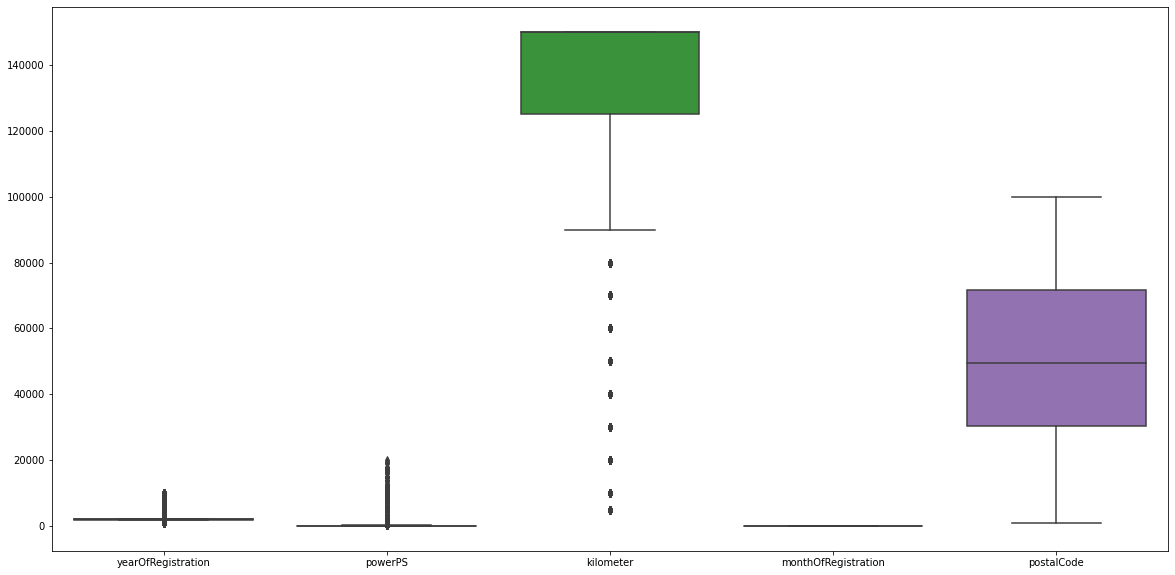

In [9]:
plt.figure(figsize=figsize)
sns.boxplot(data=data[numerical_columns])
plt.show()

мда, что-то плохо

## Выполним предварительную обработку численных данных

In [10]:
data["kilometer"].value_counts()

150000    240795
125000     38066
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
5000        7069
40000       6376
30000       6041
20000       5675
10000       1949
Name: kilometer, dtype: int64

<AxesSubplot:>

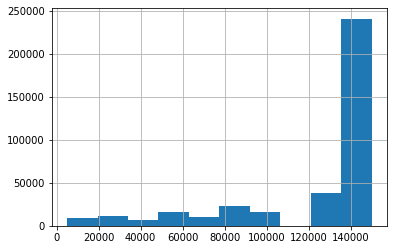

In [11]:
data["kilometer"].hist()

**Судя по всему километры играют важную роль, но выборка не сбалансированна. Есть предел в 150к километров**

In [12]:
kil_mean_price = data.groupby('kilometer', as_index=False)['price'].mean()

<AxesSubplot:xlabel='kilometer'>

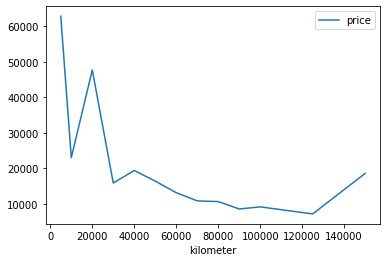

In [13]:
kil_mean_price.plot(x='kilometer', y='price')

In [14]:
P, p_value_P = pearsonr(kil_mean_price['kilometer'], kil_mean_price['price'])
S, p_value_S = spearmanr(kil_mean_price['kilometer'], kil_mean_price['price'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.6217900815966872 p_value: 0.023275831533434484
Spearman correlation: -0.7692307692307693 p_value: 0.0021122295993498776


Заметна умеренная отрицательная корреляция между медианной стоимостью авто и количеством проеханных километров

**Введём категориальный критерий количества километров для стратифицированного разбиения выборки на тестовую и валидационную**

In [15]:
data["kilometer_cat"] = pd.cut(data["kilometer"],
                               bins=[0, 140000, np.inf],
                               labels=[1, 2])

<AxesSubplot:>

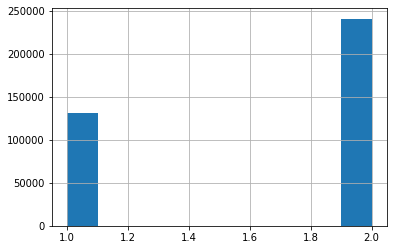

In [16]:
data["kilometer_cat"].hist()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          371524 non-null  object  
 1   name                 371524 non-null  object  
 2   seller               371524 non-null  object  
 3   offerType            371524 non-null  object  
 4   price                371524 non-null  int64   
 5   abtest               371524 non-null  object  
 6   vehicleType          333655 non-null  object  
 7   yearOfRegistration   371524 non-null  int64   
 8   gearbox              351315 non-null  object  
 9   powerPS              371524 non-null  int64   
 10  model                351040 non-null  object  
 11  kilometer            371524 non-null  int64   
 12  monthOfRegistration  371524 non-null  int64   
 13  fuelType             338138 non-null  object  
 14  brand                371524 non-null  object  
 15  

In [18]:
data.groupby('kilometer_cat')['price'].median()

kilometer_cat
1    6299.0
2    2000.0
Name: price, dtype: float64

*Теперь уже лучше*

## Обратим внимание на год регистрации авто

<AxesSubplot:>

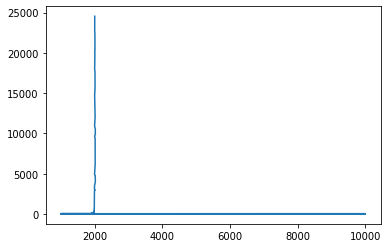

In [19]:
data["yearOfRegistration"].value_counts().plot()

**А чего такие хвосты длинные?**

In [20]:
lower_bound_year = data.yearOfRegistration.quantile(q=0.02)
upper_bound_year = data.yearOfRegistration.quantile(q=0.95)

In [21]:
def over2nan4year(val):
    if val < lower_bound_year or val > upper_bound_year:
        return np.nan
    else:
        return val

In [22]:
print(lower_bound_year, upper_bound_year)

1986.0 2016.0


**Ну эти границы по квентилям хотя бы адекватней выглядит**

In [23]:
data_year = data.copy()

In [24]:
data_year.yearOfRegistration = data_year.yearOfRegistration.apply(over2nan4year)

In [25]:
data_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          371524 non-null  object  
 1   name                 371524 non-null  object  
 2   seller               371524 non-null  object  
 3   offerType            371524 non-null  object  
 4   price                371524 non-null  int64   
 5   abtest               371524 non-null  object  
 6   vehicleType          333655 non-null  object  
 7   yearOfRegistration   349813 non-null  float64 
 8   gearbox              351315 non-null  object  
 9   powerPS              371524 non-null  int64   
 10  model                351040 non-null  object  
 11  kilometer            371524 non-null  int64   
 12  monthOfRegistration  371524 non-null  int64   
 13  fuelType             338138 non-null  object  
 14  brand                371524 non-null  object  
 15  

**Удалим все неадекватные значения по дате регистрации**

In [26]:
droped_data = data_year.loc[data_year['yearOfRegistration'].isna() == False]

In [27]:
droped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349813 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          349813 non-null  object  
 1   name                 349813 non-null  object  
 2   seller               349813 non-null  object  
 3   offerType            349813 non-null  object  
 4   price                349813 non-null  int64   
 5   abtest               349813 non-null  object  
 6   vehicleType          327702 non-null  object  
 7   yearOfRegistration   349813 non-null  float64 
 8   gearbox              332904 non-null  object  
 9   powerPS              349813 non-null  int64   
 10  model                332929 non-null  object  
 11  kilometer            349813 non-null  int64   
 12  monthOfRegistration  349813 non-null  int64   
 13  fuelType             323571 non-null  object  
 14  brand                349813 non-null  object  
 15  

In [28]:
droped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349813 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          349813 non-null  object  
 1   name                 349813 non-null  object  
 2   seller               349813 non-null  object  
 3   offerType            349813 non-null  object  
 4   price                349813 non-null  int64   
 5   abtest               349813 non-null  object  
 6   vehicleType          327702 non-null  object  
 7   yearOfRegistration   349813 non-null  float64 
 8   gearbox              332904 non-null  object  
 9   powerPS              349813 non-null  int64   
 10  model                332929 non-null  object  
 11  kilometer            349813 non-null  int64   
 12  monthOfRegistration  349813 non-null  int64   
 13  fuelType             323571 non-null  object  
 14  brand                349813 non-null  object  
 15  

<AxesSubplot:>

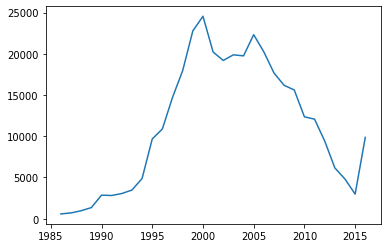

In [29]:
droped_data["yearOfRegistration"].value_counts().sort_index().plot()

**Теперь распределении более менее похоже на нормальное**

<AxesSubplot:xlabel='yearOfRegistration'>

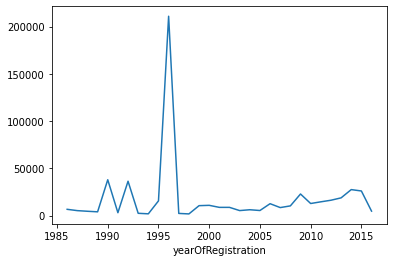

In [30]:
ye_pr_dt = droped_data.groupby('yearOfRegistration')['price'].mean()
ye_pr_dt.plot()

**Странный выброс средней стоимости наблюдается на авто 1996 года регистрации**

In [31]:
ye_pr_dt.sort_values(ascending=False).head(3)

yearOfRegistration
1996.0    210896.218446
1990.0     37921.283310
1992.0     36350.301181
Name: price, dtype: float64

In [32]:
droped_data["yearOfRegistration"].value_counts().sort_values(ascending=False)

2000.0    24551
1999.0    22766
2005.0    22316
2006.0    20230
2001.0    20217
2003.0    19872
2004.0    19746
2002.0    19188
1998.0    17951
2007.0    17673
2008.0    16175
2009.0    15607
1997.0    14706
2010.0    12354
2011.0    12068
1996.0    10886
2016.0     9859
1995.0     9658
2012.0     9418
2013.0     6157
1994.0     4872
2014.0     4802
1993.0     3469
1992.0     3048
2015.0     2982
1990.0     2852
1991.0     2810
1989.0     1342
1988.0      965
1987.0      697
1986.0      576
Name: yearOfRegistration, dtype: int64

**На 1996 зарегистрировано мало машин, так что просто удалим его**

In [33]:
droped_data_out = droped_data.loc[droped_data["yearOfRegistration"] != 1996]

<AxesSubplot:xlabel='yearOfRegistration'>

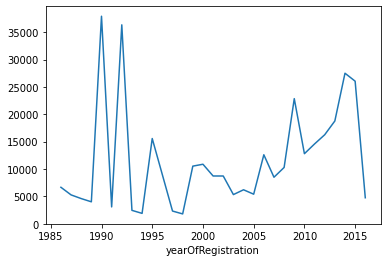

In [34]:
ye_pr_dt2 = droped_data_out.groupby('yearOfRegistration')['price'].mean()
ye_pr_dt2.plot()

In [35]:
P, p_value_P = pearsonr(ye_pr_dt.index, ye_pr_dt.values)
S, p_value_S = spearmanr(ye_pr_dt.index, ye_pr_dt.values)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.03923866391848099 p_value: 0.8340000253686994
Spearman correlation: 0.37379032258064515 p_value: 0.03832023935900808


**С 1996**

In [36]:
P, p_value_P = pearsonr(ye_pr_dt2.index, ye_pr_dt2.values)
S, p_value_S = spearmanr(ye_pr_dt2.index, ye_pr_dt2.values)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.22931006133300197 p_value: 0.22286796044233165
Spearman correlation: 0.43492769744160176 p_value: 0.016309663296980074


**Без 1996**

In [37]:
without_norm = data.groupby('yearOfRegistration')['price'].mean()

In [38]:
P, p_value_P = pearsonr(without_norm.index, without_norm.values)
S, p_value_S = spearmanr(without_norm.index, without_norm.values)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.06264105772092957 p_value: 0.4387398314391134
Spearman correlation: -0.1867657019485127 p_value: 0.019970295365803768


**Вообще без нормализации и удаления выбросов**

In [39]:
data2 = droped_data_out

## Дальше надо разобраться с мощностью двигателя (там тоже приколы ещё те)

In [40]:
data2.groupby('powerPS')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
powerPS,,,,,,,,
0,33722.0,21859.724809,1.291575e+06,0.0,399.0,1050.0,2700.0,99999999.0
1,27.0,1233.851852,1.894712e+03,0.0,105.0,490.0,1300.0,6800.0
2,9.0,4323.333333,4.595006e+03,1500.0,2100.0,2300.0,3000.0,14911.0
3,7.0,2764.000000,1.772692e+03,700.0,999.5,3900.0,3974.5,4800.0
4,29.0,3120.517241,2.094474e+03,250.0,1100.0,3100.0,5400.0,6200.0
...,...,...,...,...,...,...,...,...
17932,1.0,3250.000000,NaN,3250.0,3250.0,3250.0,3250.0,3250.0
19208,1.0,2100.000000,NaN,2100.0,2100.0,2100.0,2100.0,2100.0
19211,1.0,9999.000000,NaN,9999.0,9999.0,9999.0,9999.0,9999.0


**у 30к пропущено значение мощности двигателя**

<AxesSubplot:>

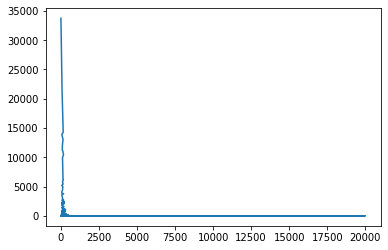

In [41]:
data2.powerPS.value_counts().plot()

**Ну и хвост, а максимальная зарегистрированная мощность двигателя 16к, вроде(здесь же белазы не продают)**

*уберём нулевую мощность, чтобы не портили выборку*

In [42]:
data_power = data2.loc[data2['powerPS'] != 0]

In [43]:
lower_bound_pow = data_power.powerPS.quantile(q=0.01)
upper_bound_pow = data_power.powerPS.quantile(q=0.99)

In [44]:
print(lower_bound_pow)
print(upper_bound_pow)

45.0
349.0


**Ставим границы разброса**

In [45]:
data2.loc[(data2['powerPS'] > upper_bound_pow) | (data2['powerPS'] < lower_bound_pow)]["powerPS"].count()

38579

*ну не так уж и много, можно будет заполнить пропуски*

In [46]:
def over2nan4pow(val):
    if val > upper_bound_pow or val < lower_bound_pow:
        return np.nan
    else:
        return val

In [47]:
data_pow = data2.copy()

In [48]:
data_pow.powerPS = data_pow.powerPS.apply(over2nan4pow)

<AxesSubplot:>

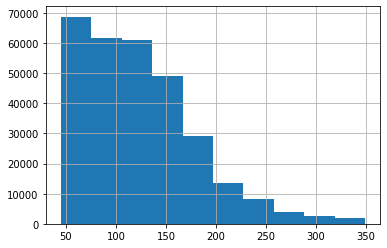

In [49]:
data_pow.powerPS.hist()

In [50]:
data_pow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338927 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          338927 non-null  object  
 1   name                 338927 non-null  object  
 2   seller               338927 non-null  object  
 3   offerType            338927 non-null  object  
 4   price                338927 non-null  int64   
 5   abtest               338927 non-null  object  
 6   vehicleType          316856 non-null  object  
 7   yearOfRegistration   338927 non-null  float64 
 8   gearbox              322391 non-null  object  
 9   powerPS              300348 non-null  float64 
 10  model                322700 non-null  object  
 11  kilometer            338927 non-null  int64   
 12  monthOfRegistration  338927 non-null  int64   
 13  fuelType             313648 non-null  object  
 14  brand                338927 non-null  object  
 15  

In [51]:
corr_matrix = data_pow.corr()

In [52]:
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
powerPS                0.014242
yearOfRegistration     0.003090
postalCode            -0.000923
monthOfRegistration   -0.003140
kilometer             -0.011455
nrOfPictures                NaN
Name: price, dtype: float64

In [53]:
data3 = data_pow.copy()

### 6 Заполните пропущенные значения в данных

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [55]:
data_imp = data3.get(["powerPS"])

In [56]:
imputer.fit(data_imp)

SimpleImputer(strategy='median')

In [57]:
imputer.statistics_

array([116.])

In [58]:
data_imp = imputer.transform(data_imp)

In [59]:
data3.powerPS = data_imp

In [60]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338927 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          338927 non-null  object  
 1   name                 338927 non-null  object  
 2   seller               338927 non-null  object  
 3   offerType            338927 non-null  object  
 4   price                338927 non-null  int64   
 5   abtest               338927 non-null  object  
 6   vehicleType          316856 non-null  object  
 7   yearOfRegistration   338927 non-null  float64 
 8   gearbox              322391 non-null  object  
 9   powerPS              338927 non-null  float64 
 10  model                322700 non-null  object  
 11  kilometer            338927 non-null  int64   
 12  monthOfRegistration  338927 non-null  int64   
 13  fuelType             313648 non-null  object  
 14  brand                338927 non-null  object  
 15  

In [61]:
data3["seller"].value_counts()

privat        338925
gewerblich         2
Name: seller, dtype: int64

In [62]:
clear_data = data3.drop(columns=['lastSeen', 'nrOfPictures', 'seller', 'name', 'offerType'])

In [63]:
clear_data_model = clear_data.drop(columns=['dateCrawled', 'dateCreated'])
clear_data = clear_data_model.drop(columns=['model'])

In [64]:
clear_data.shape

(338927, 13)

In [65]:
clear_data_model.shape

(338927, 14)

In [66]:
clear_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338927 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                338927 non-null  int64   
 1   abtest               338927 non-null  object  
 2   vehicleType          316856 non-null  object  
 3   yearOfRegistration   338927 non-null  float64 
 4   gearbox              322391 non-null  object  
 5   powerPS              338927 non-null  float64 
 6   kilometer            338927 non-null  int64   
 7   monthOfRegistration  338927 non-null  int64   
 8   fuelType             313648 non-null  object  
 9   brand                338927 non-null  object  
 10  notRepairedDamage    278266 non-null  object  
 11  postalCode           338927 non-null  int64   
 12  kilometer_cat        338927 non-null  category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 33.9+ MB


### 3 Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования

In [67]:
data_x = clear_data.copy()

In [68]:
numerical_columns = ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']

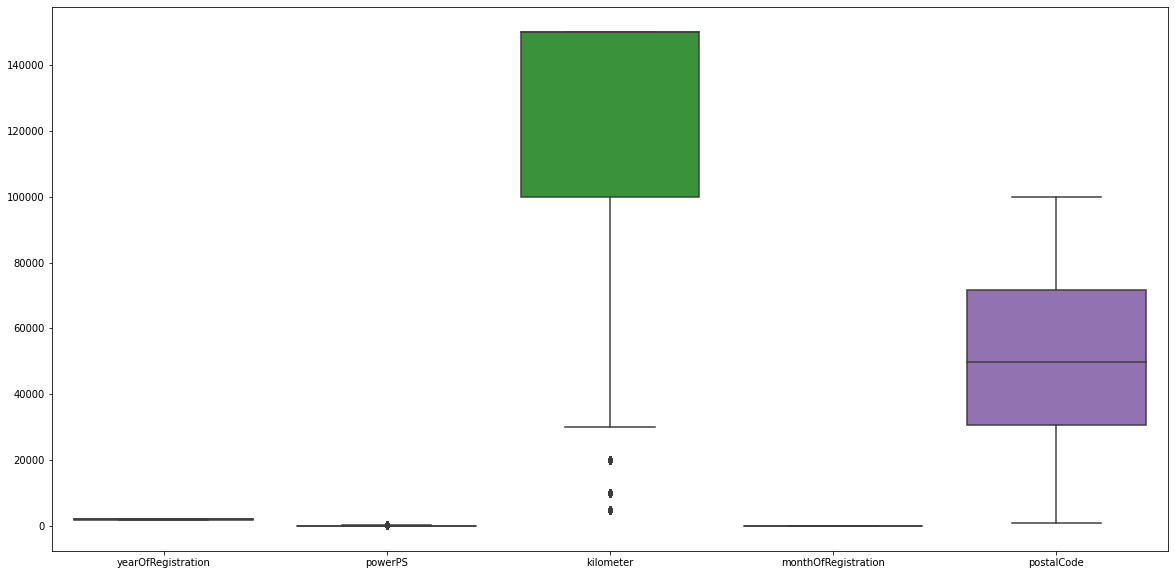

In [69]:
plt.figure(figsize=figsize)
sns.boxplot(data=data_x[numerical_columns])
plt.show()

In [70]:
scaler = MinMaxScaler()
data_x[numerical_columns] = scaler.fit_transform(data_x[numerical_columns])
data_x.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,3.389270e+05,338927.000000,338927.000000,338927.000000,338927.000000,338927.000000
mean,1.021979e+04,0.586311,0.260467,0.831670,0.484417,0.504853
std,5.936434e+05,0.198003,0.170374,0.274769,0.307245,0.260643
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,0.433333,0.148026,0.655172,0.250000,0.300775
50%,3.000000e+03,0.566667,0.233553,1.000000,0.500000,0.492677
75%,7.500000e+03,0.733333,0.345395,1.000000,0.750000,0.713871
max,1.000000e+08,1.000000,1.000000,1.000000,1.000000,1.000000


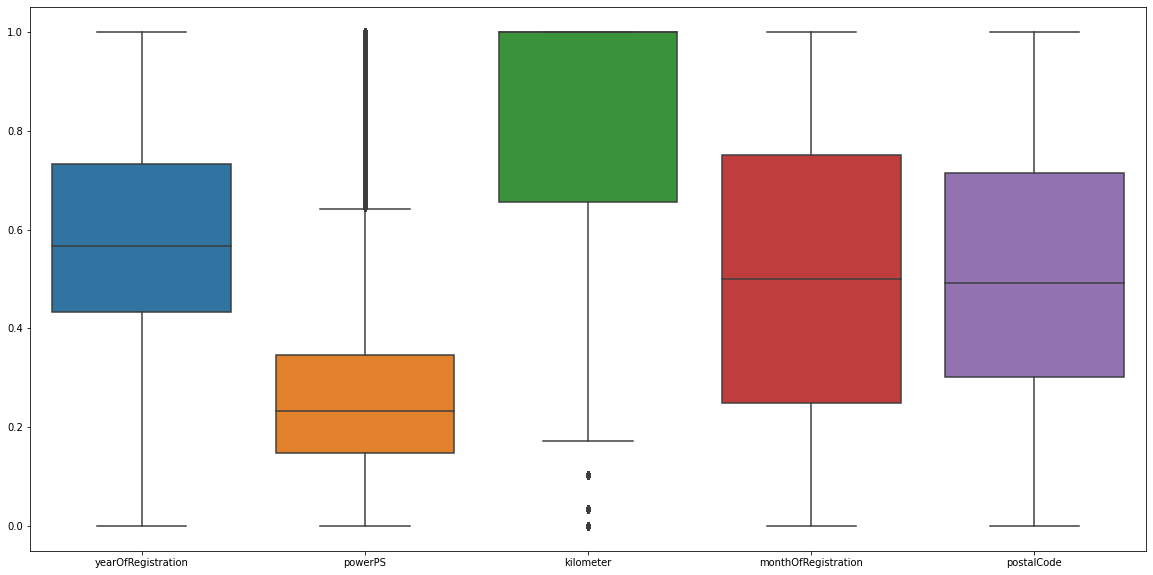

In [71]:
plt.figure(figsize=figsize)
sns.boxplot(data=data_x[numerical_columns])
plt.show()

### 4 Выполните замену категориальных признаков

In [72]:
def replace_gearbox(name):
    if name == "manuell":
        return 0
    elif name == "automatik":
        return 1
    else:
        return -1

In [73]:
def replace_notRepairedDamage(name):
    if name == "ja":
        return -1
    elif name == "nein":
        return 1
    else:
        return 0

In [74]:
def replace_abtest(name):
    if name == "control":
        return 0
    elif name == "test":
        return 1
    else:
        return -1

hash_space = 25
def hash_data(name):
    return hash(name) % hash_space

data_x.vehicleType = data_x.vehicleType.apply(str).apply(hash_data)

hash_space = 64
data_x.brand = data_x.brand.apply(str).apply(hash_data)

hash_space = 16
data_x.fuelType = data_x.fuelType.apply(str).apply(hash_data)

In [75]:
data_x.abtest = data_x.abtest.apply(str).apply(replace_abtest)

In [76]:
data_x.gearbox = data_x.gearbox.apply(str).apply(replace_gearbox)

In [77]:
data_x.notRepairedDamage = data_x.notRepairedDamage.apply(str).apply(replace_notRepairedDamage)

In [78]:
cat_cols = ['vehicleType', 'brand', 'fuelType']

In [79]:
data_x.shape

(338927, 13)

In [80]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338927 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                338927 non-null  int64   
 1   abtest               338927 non-null  int64   
 2   vehicleType          316856 non-null  object  
 3   yearOfRegistration   338927 non-null  float64 
 4   gearbox              338927 non-null  int64   
 5   powerPS              338927 non-null  float64 
 6   kilometer            338927 non-null  float64 
 7   monthOfRegistration  338927 non-null  float64 
 8   fuelType             313648 non-null  object  
 9   brand                338927 non-null  object  
 10  notRepairedDamage    338927 non-null  int64   
 11  postalCode           338927 non-null  float64 
 12  kilometer_cat        338927 non-null  category
dtypes: category(1), float64(5), int64(4), object(3)
memory usage: 33.9+ MB


In [81]:
data_x = data_x.dropna()

In [82]:
data_x.shape

(302565, 13)

In [83]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302565 entries, 1 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                302565 non-null  int64   
 1   abtest               302565 non-null  int64   
 2   vehicleType          302565 non-null  object  
 3   yearOfRegistration   302565 non-null  float64 
 4   gearbox              302565 non-null  int64   
 5   powerPS              302565 non-null  float64 
 6   kilometer            302565 non-null  float64 
 7   monthOfRegistration  302565 non-null  float64 
 8   fuelType             302565 non-null  object  
 9   brand                302565 non-null  object  
 10  notRepairedDamage    302565 non-null  int64   
 11  postalCode           302565 non-null  float64 
 12  kilometer_cat        302565 non-null  category
dtypes: category(1), float64(5), int64(4), object(3)
memory usage: 30.3+ MB


In [84]:
le = LabelEncoder()

In [85]:
data_x[cat_cols] = data_x[cat_cols].apply(lambda col: le.fit_transform(col))
data_x[cat_cols].head(10)

,vehicleType,brand,fuelType
1,3,1,3
2,7,14,3
3,4,38,1
4,4,31,3
5,6,2,1
6,2,25,1
8,1,10,1
10,6,19,1
11,5,38,3
12,5,38,1


In [86]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302565 entries, 1 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                302565 non-null  int64   
 1   abtest               302565 non-null  int64   
 2   vehicleType          302565 non-null  int64   
 3   yearOfRegistration   302565 non-null  float64 
 4   gearbox              302565 non-null  int64   
 5   powerPS              302565 non-null  float64 
 6   kilometer            302565 non-null  float64 
 7   monthOfRegistration  302565 non-null  float64 
 8   fuelType             302565 non-null  int64   
 9   brand                302565 non-null  int64   
 10  notRepairedDamage    302565 non-null  int64   
 11  postalCode           302565 non-null  float64 
 12  kilometer_cat        302565 non-null  category
dtypes: category(1), float64(5), int64(7)
memory usage: 30.3 MB


In [87]:
data_x.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,kilometer_cat
1,18300,1,3,0.833333,0,0.476974,0.827586,0.416667,3,1,-1,0.665989,1
2,9800,1,7,0.600000,1,0.388158,0.827586,0.666667,3,14,0,0.903792,1
3,1500,1,4,0.500000,0,0.098684,1.000000,0.500000,1,38,1,0.909796,2
4,3600,1,4,0.733333,0,0.078947,0.586207,0.583333,3,31,1,0.600115,1
5,650,1,6,0.300000,0,0.187500,1.000000,0.833333,1,2,-1,0.330614,2


In [88]:
data_x, data_y = data_x.drop(['price'], axis=1), data_x['price']

In [89]:
data_x.shape

(302565, 12)

In [90]:
data_y.shape

(302565,)

## С моделью машины

In [91]:
datam_x = clear_data_model.copy()

In [92]:
datam_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338927 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                338927 non-null  int64   
 1   abtest               338927 non-null  object  
 2   vehicleType          316856 non-null  object  
 3   yearOfRegistration   338927 non-null  float64 
 4   gearbox              322391 non-null  object  
 5   powerPS              338927 non-null  float64 
 6   model                322700 non-null  object  
 7   kilometer            338927 non-null  int64   
 8   monthOfRegistration  338927 non-null  int64   
 9   fuelType             313648 non-null  object  
 10  brand                338927 non-null  object  
 11  notRepairedDamage    278266 non-null  object  
 12  postalCode           338927 non-null  int64   
 13  kilometer_cat        338927 non-null  category
dtypes: category(1), float64(2), int64(4), object(7)
memo

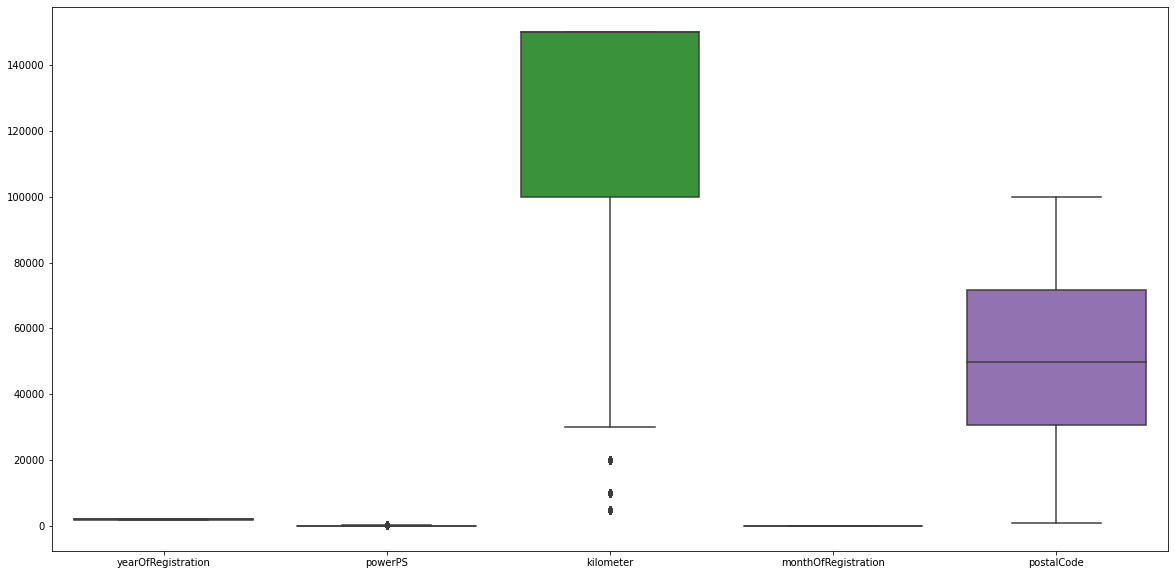

In [93]:
plt.figure(figsize=figsize)
sns.boxplot(data=datam_x[numerical_columns])
plt.show()

In [94]:
scaler = MinMaxScaler()
datam_x[numerical_columns] = scaler.fit_transform(datam_x[numerical_columns])
datam_x.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,3.389270e+05,338927.000000,338927.000000,338927.000000,338927.000000,338927.000000
mean,1.021979e+04,0.586311,0.260467,0.831670,0.484417,0.504853
std,5.936434e+05,0.198003,0.170374,0.274769,0.307245,0.260643
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,0.433333,0.148026,0.655172,0.250000,0.300775
50%,3.000000e+03,0.566667,0.233553,1.000000,0.500000,0.492677
75%,7.500000e+03,0.733333,0.345395,1.000000,0.750000,0.713871
max,1.000000e+08,1.000000,1.000000,1.000000,1.000000,1.000000


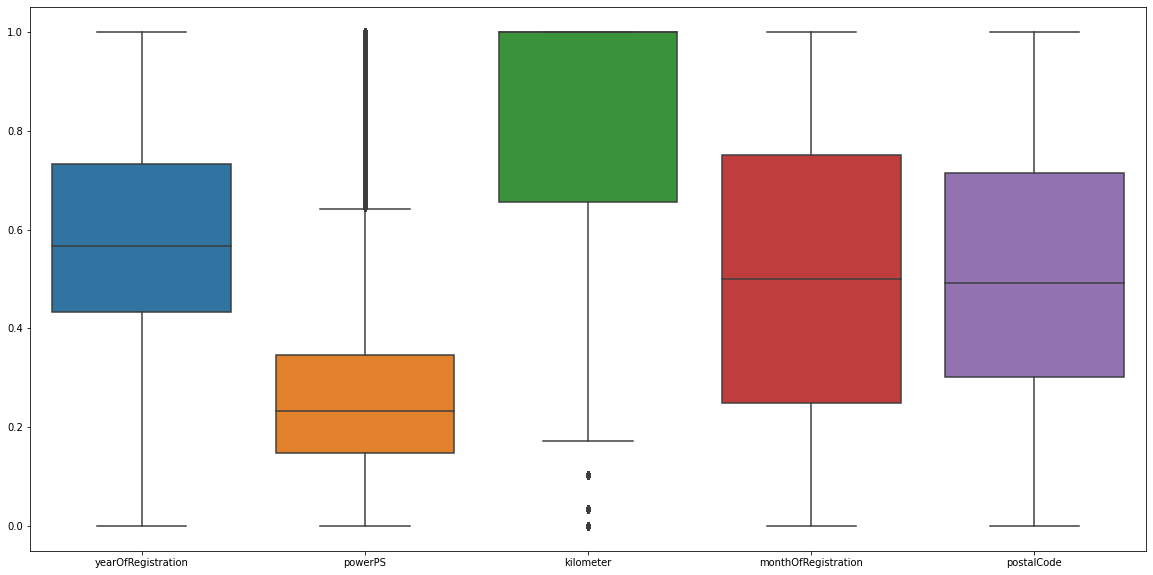

In [95]:
plt.figure(figsize=figsize)
sns.boxplot(data=datam_x[numerical_columns])
plt.show()

datam_x.vehicleType = datam_x.vehicleType.apply(str).apply(hash_data)

hash_space = 64
datam_x.brand = datam_x.brand.apply(str).apply(hash_data)

hash_space = 16
datam_x.fuelType = datam_x.fuelType.apply(str).apply(hash_data)

In [96]:
datam_x.model.value_counts()

golf               26863
andere             22428
3er                19002
polo               11484
corsa              11157
                   ...  
i3                    10
elefantino             8
kalina                 6
rangerover             4
discovery_sport        1
Name: model, Length: 248, dtype: int64

hash_space = 256
datam_x.model = datam_x.model.apply(str).apply(hash_data)

In [97]:
datam_x.abtest = datam_x.abtest.apply(str).apply(replace_abtest)

In [98]:
datam_x.gearbox = datam_x.gearbox.apply(str).apply(replace_gearbox)

In [99]:
datam_x.notRepairedDamage = datam_x.notRepairedDamage.apply(str).apply(replace_notRepairedDamage)

In [100]:
cat_cols2 = ['vehicleType', 'brand', 'fuelType', 'model']

In [101]:
datam_x.shape

(338927, 14)

In [102]:
datam_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338927 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                338927 non-null  int64   
 1   abtest               338927 non-null  int64   
 2   vehicleType          316856 non-null  object  
 3   yearOfRegistration   338927 non-null  float64 
 4   gearbox              338927 non-null  int64   
 5   powerPS              338927 non-null  float64 
 6   model                322700 non-null  object  
 7   kilometer            338927 non-null  float64 
 8   monthOfRegistration  338927 non-null  float64 
 9   fuelType             313648 non-null  object  
 10  brand                338927 non-null  object  
 11  notRepairedDamage    338927 non-null  int64   
 12  postalCode           338927 non-null  float64 
 13  kilometer_cat        338927 non-null  category
dtypes: category(1), float64(5), int64(4), object(4)
memo

In [103]:
datam_x = datam_x.dropna()

In [104]:
datam_x.shape

(293342, 14)

In [105]:
datam_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293342 entries, 2 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                293342 non-null  int64   
 1   abtest               293342 non-null  int64   
 2   vehicleType          293342 non-null  object  
 3   yearOfRegistration   293342 non-null  float64 
 4   gearbox              293342 non-null  int64   
 5   powerPS              293342 non-null  float64 
 6   model                293342 non-null  object  
 7   kilometer            293342 non-null  float64 
 8   monthOfRegistration  293342 non-null  float64 
 9   fuelType             293342 non-null  object  
 10  brand                293342 non-null  object  
 11  notRepairedDamage    293342 non-null  int64   
 12  postalCode           293342 non-null  float64 
 13  kilometer_cat        293342 non-null  category
dtypes: category(1), float64(5), int64(4), object(4)
memo

In [106]:
datam_x[cat_cols2] = datam_x[cat_cols2].apply(lambda col: le.fit_transform(col))
datam_x[cat_cols2].head(10)

,vehicleType,brand,fuelType,model
2,7,14,3,119
3,4,37,1,118
4,4,31,3,103
5,6,2,1,11
6,2,25,1,8
8,1,10,1,61
10,6,19,1,10
11,5,37,3,171
12,5,37,1,171
14,7,23,3,161


In [107]:
datam_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293342 entries, 2 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                293342 non-null  int64   
 1   abtest               293342 non-null  int64   
 2   vehicleType          293342 non-null  int64   
 3   yearOfRegistration   293342 non-null  float64 
 4   gearbox              293342 non-null  int64   
 5   powerPS              293342 non-null  float64 
 6   model                293342 non-null  int64   
 7   kilometer            293342 non-null  float64 
 8   monthOfRegistration  293342 non-null  float64 
 9   fuelType             293342 non-null  int64   
 10  brand                293342 non-null  int64   
 11  notRepairedDamage    293342 non-null  int64   
 12  postalCode           293342 non-null  float64 
 13  kilometer_cat        293342 non-null  category
dtypes: category(1), float64(5), int64(8)
memory usage: 3

In [108]:
datam_x.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,kilometer_cat
2,9800,1,7,0.600000,1,0.388158,119,0.827586,0.666667,3,14,0,0.903792,1
3,1500,1,4,0.500000,0,0.098684,118,1.000000,0.500000,1,37,1,0.909796,2
4,3600,1,4,0.733333,0,0.078947,103,0.586207,0.583333,3,31,1,0.600115,1
5,650,1,6,0.300000,0,0.187500,11,1.000000,0.833333,1,2,-1,0.330614,2
6,2200,1,2,0.600000,0,0.210526,8,1.000000,0.666667,1,25,1,0.667586,2


In [109]:
datam_x, datam_y = datam_x.drop(['price'], axis=1), datam_x['price']

In [110]:
datam_x.shape

(293342, 13)

In [111]:
datam_y.shape

(293342,)

In [112]:
datam_x.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,kilometer_cat
2,1,7,0.600000,1,0.388158,119,0.827586,0.666667,3,14,0,0.903792,1
3,1,4,0.500000,0,0.098684,118,1.000000,0.500000,1,37,1,0.909796,2
4,1,4,0.733333,0,0.078947,103,0.586207,0.583333,3,31,1,0.600115,1
5,1,6,0.300000,0,0.187500,11,1.000000,0.833333,1,2,-1,0.330614,2
6,1,2,0.600000,0,0.210526,8,1.000000,0.666667,1,25,1,0.667586,2


### 7.1 Решите поставленную задачу регрессии в соответствии с заданием.

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
#data_x, data_y = data_new.drop(columns=0), data_new[0]
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 42)

<AxesSubplot:>

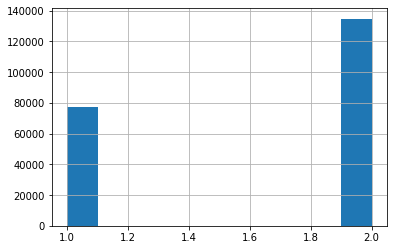

In [115]:
train_x.kilometer_cat.hist()

<AxesSubplot:>

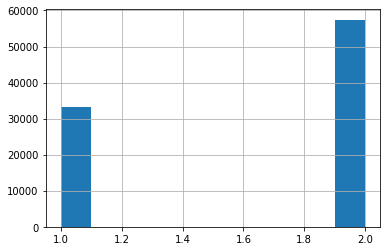

In [116]:
test_x.kilometer_cat.hist()

In [117]:
test_x = test_x.drop("kilometer_cat", axis=1)

In [118]:
train_x = train_x.drop("kilometer_cat", axis=1)

In [119]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211795 entries, 64647 to 149658
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   abtest               211795 non-null  int64  
 1   vehicleType          211795 non-null  int64  
 2   yearOfRegistration   211795 non-null  float64
 3   gearbox              211795 non-null  int64  
 4   powerPS              211795 non-null  float64
 5   kilometer            211795 non-null  float64
 6   monthOfRegistration  211795 non-null  float64
 7   fuelType             211795 non-null  int64  
 8   brand                211795 non-null  int64  
 9   notRepairedDamage    211795 non-null  int64  
 10  postalCode           211795 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 19.4 MB


In [120]:
reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)
accuracy_score = np.mean(test_y.values == reg.predict(test_x))
print(pred_reg[:15] - test_y[:15])
lin_mse = mean_squared_error(test_y, pred_reg)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

142228     9744.090127
219258    -7994.074471
316901     1662.350784
230367     8116.826218
220940    12648.356858
190303     5042.850456
104788     4748.670647
330718     5906.478433
313062    -2607.840237
152658    11892.006792
184310    12354.486330
365007    23337.980782
329234     9313.631647
312941     7272.114077
348761     3203.207001
Name: price, dtype: float64


74217.1548571906

In [121]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.060706095076637365 p_value: 7.384598532120772e-75
Spearman correlation: 0.5471964587882385 p_value: 0.0


In [122]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [123]:
data_scores = cross_val_score(reg, train_x, train_y,
                                scoring="neg_mean_squared_error", cv=3, n_jobs=2)

In [124]:
data_rmse_scores = np.sqrt(-data_scores)
display_scores(data_rmse_scores)

Scores: [550120.5494548  658976.34911473 535303.16134592]
Mean: 581466.6866384832
Standard deviation: 55140.42425467672


## Попробуем с моделью машины

In [125]:
#data_x, data_y = data_new.drop(columns=0), data_new[0]
mtrain_x, mtest_x, mtrain_y, mtest_y = train_test_split(datam_x, datam_y, test_size = 0.3, random_state = 42)

In [126]:
mtest_x = mtest_x.drop("kilometer_cat", axis=1)

In [127]:
mtrain_x = mtrain_x.drop("kilometer_cat", axis=1)

In [128]:
mtrain_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205339 entries, 322245 to 154398
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   abtest               205339 non-null  int64  
 1   vehicleType          205339 non-null  int64  
 2   yearOfRegistration   205339 non-null  float64
 3   gearbox              205339 non-null  int64  
 4   powerPS              205339 non-null  float64
 5   model                205339 non-null  int64  
 6   kilometer            205339 non-null  float64
 7   monthOfRegistration  205339 non-null  float64
 8   fuelType             205339 non-null  int64  
 9   brand                205339 non-null  int64  
 10  notRepairedDamage    205339 non-null  int64  
 11  postalCode           205339 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 20.4 MB


In [129]:
m_reg = LinearRegression()
m_reg.fit(mtrain_x, mtrain_y)
mpred_reg = m_reg.predict(mtest_x)
accuracy_score = np.mean(test_y.values == m_reg.predict(mtest_x))
print(mpred_reg[:15] - mtest_y[:15])
m_lin_mse = mean_squared_error(mtest_y, mpred_reg)
m_lin_rmse = np.sqrt(m_lin_mse)
m_lin_rmse

122558     1552.774794
64459     -5157.876890
56780     -6015.109520
331886    10880.515064
233034     1496.683121
154584     2531.061959
343       -2061.167200
2567      -3319.116313
370902     8758.785108
99859      3542.123067
57140      1098.613287
316215    -2886.017596
347317      511.805087
119777      567.679485
353986    -8251.928855
Name: price, dtype: float64


491780.02533020155

In [130]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.060706095076637365 p_value: 7.384598532120772e-75
Spearman correlation: 0.5471964587882385 p_value: 0.0


In [131]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [132]:
data_scores = cross_val_score(m_reg, mtrain_x, mtrain_y,
                                scoring="neg_mean_squared_error", cv=3, n_jobs=2)

In [133]:
m_data_rmse_scores = np.sqrt(-data_scores)
display_scores(m_data_rmse_scores)

Scores: [542619.90523597 396373.90074977 544310.10573781]
Mean: 494434.6372411821
Standard deviation: 69342.84498232155


In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [135]:
DTR = RandomForestRegressor()

In [136]:
from joblib import parallel_backend

In [148]:
with parallel_backend('threading'):
    DTR_grid = GridSearchCV(DTR, {
        'n_estimators': list(range(12, 50)),
        'max_depth': list(range(1, 3)),
        'max_features': list(range(1, 3))}
                           )
    DTR_grid.fit(train_x, train_y)

best_depth = DTR_grid.best_estimator_.max_depth # Находим лучшую глубину
best_features = DTR_grid.best_estimator_.max_features # Находим лучшее количество признаков, которые следует учитывать при поиске

In [149]:
best_estimators = DTR_grid.best_estimator_.n_estimators

In [150]:
print(best_estimators)
print(best_depth)
print(best_features)
print("Best accuracy:", DTR_grid.best_score_)

17
2
2
Best accuracy: 0.0004365899673048013


In [151]:
DTR = RandomForestRegressor(n_estimators=best_estimators, max_depth=best_depth, max_features=best_features)

In [152]:
DTR.fit(train_x, train_y)

RandomForestRegressor(max_depth=2, max_features=2, n_estimators=17)

In [153]:
accuracy_score = np.mean(test_y.values == DTR.predict(test_x))
print("Accuracy of DTR model:",  accuracy_score)

Accuracy of DTR model: 0.0


In [154]:
DT_reg = DTR.predict(test_x)
accuracy_score_D = np.mean(test_y.values == DTR.predict(test_x))
print(DT_reg[:15] - test_y[:15])
DT_mse = mean_squared_error(test_y, DT_reg)
DT_rmse = np.sqrt(DT_mse)
print(DT_rmse)
print(accuracy_score_D)

142228     3774.338696
219258     5575.338696
316901     5407.218109
230367     5358.898678
220940     7904.249475
190303    -3087.533655
104788     9844.140099
330718      114.012195
313062     3387.233205
152658     6864.663115
184310   -11239.806238
365007     6525.462865
329234     7717.804257
312941     4794.409753
348761      626.845351
Name: price, dtype: float64
74091.6658395513
0.0


In [155]:
data_scores = cross_val_score(DTR, train_x, train_y,
                                scoring="neg_mean_squared_error", cv=4, n_jobs=2)

In [156]:
m_data_rmse_scores = np.sqrt(-data_scores)
display_scores(m_data_rmse_scores)

Scores: [438032.27745141 767818.05915423 448727.5469678  618083.99981581]
Mean: 568165.4708473126
Standard deviation: 135603.35655515175


In [135]:
MRF = RandomForestRegressor()

In [138]:
with parallel_backend('threading'):
    MRF_grid = GridSearchCV(MRF, {
        'n_estimators': list(range(240, 250)),
        'max_depth': list(range(1, 13)),
        'max_features': list(range(1, 8))}
                           )
    MRF_grid.fit(mtrain_x, mtrain_y)

best_depth_m = MRF_grid.best_estimator_.max_depth # Находим лучшую глубину
best_features_m = MRF_grid.best_estimator_.max_features # Находим лучшее количество признаков, которые следует учитывать при поиске
best_estimators_m = MRF_grid.best_estimator_.n_estimators

In [139]:
print(best_estimators_m)
print(best_depth_m)
print(best_features_m)
print("Best accuracy:", MRF_grid.best_score_)

240
1
5
Best accuracy: 0.000576298772781203


MRF = RandomForestRegressor(n_estimators=best_estimators_m, max_depth=best_depth_m, max_features=best_features_m)

In [136]:
MRF = RandomForestRegressor(n_estimators=240, max_depth=1, max_features=5)

In [137]:
MRF.fit(mtrain_x, mtrain_y)

RandomForestRegressor(max_depth=1, max_features=5, n_estimators=240)

In [138]:
accuracy_score_m = np.mean(mtest_y.values == MRF.predict(mtest_x))
print("Accuracy of DTR model:",  accuracy_score_m)

Accuracy of DTR model: 0.0


In [139]:
MRF_reg = MRF.predict(mtest_x)
accuracy_score_RFm = np.mean(mtest_y.values == MRF.predict(mtest_x))
print(MRF_reg[:15] - mtest_y[:15])
MRF_mse = mean_squared_error(mtest_y, MRF_reg)
MRF_rmse = np.sqrt(MRF_mse)
print(MRF_rmse)
print(accuracy_score_RFm)

122558     2500.119176
64459    -12224.534538
56780      4401.117739
331886     6416.073752
233034     5398.245391
154584     2605.112623
343        4898.245391
2567       4880.251329
370902     6172.298358
99859      5975.215577
57140      5377.414833
316215    -2804.090177
347317     5505.783670
119777     3751.625955
353986   -15994.139386
Name: price, dtype: float64
491780.63981839496
0.0


In [140]:
P, p_value_P = pearsonr(MRF_reg, mtest_y)
S, p_value_S = spearmanr(MRF_reg, mtest_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.012432029381985411 p_value: 0.00022594472588889324
Spearman correlation: 0.5952684336309905 p_value: 0.0


In [169]:
data_scores_mRF = cross_val_score(MRF, mtrain_x, mtrain_y,
                                scoring="neg_mean_squared_error", cv=4, n_jobs=2)

In [170]:
mRF_data_rmse_scores = np.sqrt(-data_scores_mRF)
display_scores(mRF_data_rmse_scores)

Scores: [624192.27677073 132687.36021904 441422.61450782 628455.4347535 ]
Mean: 456689.42156277195
Standard deviation: 201724.55288269641


### 7.2

In [1205]:
las_reg = Lasso()
params = {'alpha': np.arange(3, 20, 0.05)}
reg_grid = GridSearchCV(las_reg, params, n_jobs=-1)
reg_grid.fit(train_x, train_y)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 19.94999999999994


In [1206]:
reg_las_norm = Lasso(alpha=best_alpha)
reg_las_norm.fit(train_x,train_y)
pred_reg_norm = reg_las_norm.predict(test_x)
print(pred_reg_norm[:15] - test_y[:15])

80825     -9137.305089
163966     3551.846326
210181    14153.992440
274050    -8812.161251
60712     13715.934184
157908     1425.925180
22768     -6670.037276
179108    19871.921275
313027     9520.178282
309778    -7452.949827
332177    16507.704222
313010    11052.931732
339154    -8033.510541
252920    -2145.692174
91986     -5103.972296
Name: price, dtype: float64


In [1207]:
# Корреляция
P, p_value_P = pearsonr(pred_reg_norm, test_y)
S, p_value_S = spearmanr(pred_reg_norm, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.013396236092825734 p_value: 1.9386896412465385e-05
Spearman correlation: 0.2938271901361857 p_value: 0.0


In [1208]:
data_norm_scores = cross_val_score(reg_las_norm, train_x, train_y,
                                scoring="neg_mean_squared_error", cv=3, n_jobs=2)

In [1209]:
data_rmse_scores = np.sqrt(-data_norm_scores)
display_scores(data_rmse_scores)

Scores: [762644.0580031   92062.62804501 629213.00436158]
Mean: 494639.896803233
Standard deviation: 289830.185349505


### END

In [107]:
data["lastSeen"].head()

0    2016-04-07 03:16:57
1    2016-04-07 01:46:50
2    2016-04-05 12:47:46
3    2016-03-17 17:40:17
4    2016-04-06 10:17:21
Name: lastSeen, dtype: object

In [108]:
def get_last_data(name):
    return name.split(' ')[0].split('-')[0].strip()

In [111]:
get_last_data("2016-04-07 03:16:57")

'2016'

In [132]:
last_names = data['lastSeen'].apply(str).apply(get_last_data)
last_names.value_counts()

2016    371528
Name: lastSeen, dtype: int64

In [411]:
corr_matrix = droped_data.corr()

In [367]:
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
yearOfRegistration     0.014788
powerPS                0.008335
monthOfRegistration    0.004877
postalCode             0.000963
kilometer             -0.013136
nrOfPictures                NaN
Name: price, dtype: float64

In [412]:
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
yearOfRegistration     0.003090
powerPS                0.002503
postalCode            -0.000923
monthOfRegistration   -0.003140
kilometer             -0.011455
nrOfPictures                NaN
Name: price, dtype: float64

In [414]:
clear_data = droped_data.drop(columns=['lastSeen', 'nrOfPictures', 'seller', 'name', 'offerType'])

In [463]:
clear_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338931 entries, 0 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          338931 non-null  object  
 1   price                338931 non-null  int64   
 2   abtest               338931 non-null  int64   
 3   vehicleType          338931 non-null  int64   
 4   yearOfRegistration   338931 non-null  float64 
 5   gearbox              338931 non-null  int64   
 6   powerPS              338931 non-null  int64   
 7   model                322704 non-null  object  
 8   kilometer            338931 non-null  int64   
 9   monthOfRegistration  338931 non-null  int64   
 10  fuelType             338931 non-null  int64   
 11  brand                338931 non-null  int64   
 12  notRepairedDamage    338931 non-null  int64   
 13  dateCreated          338931 non-null  object  
 14  postalCode           338931 non-null  int64   
 15  

In [458]:
clear_data.fuelType.value_counts().count()

7

In [460]:
clear_data.fuelType.value_counts()

10    203484
5     109110
12     25279
9        690
15       268
4        100
Name: fuelType, dtype: int64

In [461]:
corr_matrix_clear = clear_data.corr()

In [462]:
corr_matrix_clear["price"].sort_values(ascending=False)

price                  1.000000
yearOfRegistration     0.003090
powerPS                0.002503
abtest                 0.001518
fuelType              -0.000729
postalCode            -0.000923
brand                 -0.001612
notRepairedDamage     -0.002536
gearbox               -0.002785
monthOfRegistration   -0.003140
vehicleType           -0.005477
kilometer             -0.011455
Name: price, dtype: float64

In [510]:
new_clear_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338931 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   price                338931 non-null  int64   
 1   abtest               338931 non-null  int64   
 2   vehicleType          338931 non-null  int64   
 3   yearOfRegistration   338931 non-null  float64 
 4   gearbox              338931 non-null  int64   
 5   powerPS              338931 non-null  int64   
 6   kilometer            338931 non-null  int64   
 7   monthOfRegistration  338931 non-null  int64   
 8   fuelType             338931 non-null  int64   
 9   brand                338931 non-null  int64   
 10  notRepairedDamage    338931 non-null  int64   
 11  postalCode           338931 non-null  int64   
 12  kilometer_cat        338931 non-null  category
dtypes: category(1), float64(1), int64(11)
memory usage: 33.9 MB


<AxesSubplot:>

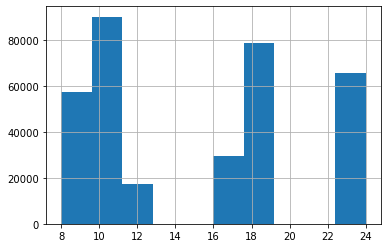

In [464]:
clear_data.vehicleType.hist()

<AxesSubplot:xlabel='yearOfRegistration'>

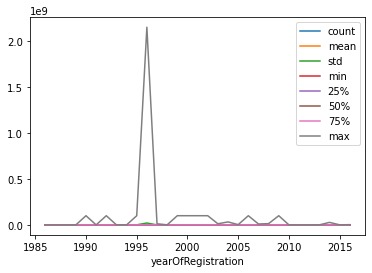

In [275]:
norm_new_price = data_kilo.groupby('yearOfRegistration')['price'].mean()
norm_new_price.plot()

In [282]:
data_kilo["yearOfRegistration"].value_counts()

2000.0    24551
1999.0    22767
2005.0    22316
2006.0    20230
2001.0    20218
2003.0    19873
2004.0    19746
2002.0    19189
1998.0    17951
2007.0    17673
2008.0    16175
2009.0    15607
1997.0    14706
2010.0    12354
2011.0    12068
1996.0    10886
2016.0     9859
1995.0     9658
2012.0     9418
2013.0     6157
1994.0     4872
2014.0     4802
1993.0     3469
1992.0     3048
2015.0     2982
1990.0     2852
1991.0     2810
1989.0     1342
1988.0      965
1987.0      697
1986.0      576
Name: yearOfRegistration, dtype: int64

In [276]:
data_kilo.groupby('yearOfRegistration')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
yearOfRegistration,,,,,,,,
1986.0,576.0,6652.793403,1.591000e+04,0.0,950.0,2500.0,5900.00,2.000000e+05
1987.0,697.0,5262.538020,1.176112e+04,0.0,900.0,2200.0,4758.00,1.740000e+05
1988.0,965.0,4587.361658,1.211388e+04,0.0,950.0,2000.0,4500.00,2.250000e+05
1989.0,1342.0,3996.688525,1.145883e+04,0.0,700.0,1724.5,3700.00,1.890000e+05
1990.0,2852.0,37921.283310,1.872480e+06,0.0,400.0,1090.0,2600.00,1.000000e+08
1991.0,2810.0,3065.327758,9.263643e+03,0.0,550.0,1200.0,2800.00,2.700000e+05
1992.0,3048.0,36350.301181,1.811501e+06,0.0,550.0,1200.0,2900.00,1.000000e+08
1993.0,3469.0,2435.334967,1.087364e+04,0.0,490.0,900.0,1999.00,4.660000e+05
1994.0,4872.0,1882.924877,5.428406e+03,0.0,500.0,899.0,1700.00,1.550000e+05


In [291]:
data_kilo[data_kilo['yearOfRegistration'] == 1996].price

500     500
0       471
600     346
750     311
650     307
       ... 
2480      1
1525      1
3210      1
2560      1
9200      1
Name: price, Length: 595, dtype: int64

In [272]:
P, p_value_P = pearsonr(norm_new_price.index, norm_new_price.values)
S, p_value_S = spearmanr(norm_new_price.index, norm_new_price.values)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.039238624277563645 p_value: 0.8340001907572963
Spearman correlation: 0.37379032258064515 p_value: 0.03832023935900808


<AxesSubplot:xlabel='yearOfRegistration'>

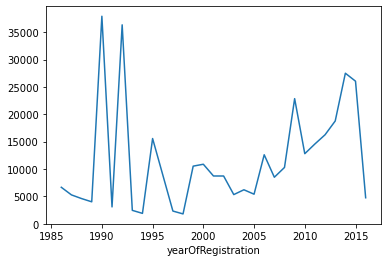

In [273]:
norm_new_price_droped = norm_new_price.drop(1996)
norm_new_price_droped.plot()

In [274]:
P, p_value_P = pearsonr(norm_new_price_droped.index, norm_new_price_droped.values)
S, p_value_S = spearmanr(norm_new_price_droped.index, norm_new_price_droped.values)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.2293100111788442 p_value: 0.22286806443049617
Spearman correlation: 0.43492769744160176 p_value: 0.016309663296980074


Можно наблюдать незначительную корреляцию года и средней ценой всех авто, зарегистрированных в этом году, правда есть довольно большие выбросы

In [260]:
print(lower_bound, upper_bound)

1986.0 2016.0


In [262]:
res_yer = data[(data.yearOfRegistration > lower_bound) & (data.yearOfRegistration < upper_bound)]["yearOfRegistration"].value_counts()

In [263]:
res_yer.sort_index()

1987      697
1988      965
1989     1342
1990     2852
1991     2810
1992     3048
1993     3469
1994     4872
1995     9658
1996    10886
1997    14706
1998    17951
1999    22767
2000    24551
2001    20218
2002    19189
2003    19873
2004    19746
2005    22316
2006    20230
2007    17673
2008    16175
2009    15607
2010    12354
2011    12068
2012     9418
2013     6157
2014     4802
2015     2982
Name: yearOfRegistration, dtype: int64

def hampel(vals_orig):
    vals = vals_orig.copy()    
    difference = np.abs(vals.median()-vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

type(hampel(data.yearOfRegistration).value_counts())

hampel(data.yearOfRegistration).value_counts().sort_index().plot()

In [140]:
data.count()

dateCrawled            371528
name                   371528
seller                 371528
offerType              371528
price                  371528
abtest                 371528
vehicleType            333659
yearOfRegistration     371528
gearbox                351319
powerPS                371528
model                  351044
kilometer              371528
monthOfRegistration    371528
fuelType               338142
brand                  371528
notRepairedDamage      299468
dateCreated            371528
nrOfPictures           371528
postalCode             371528
lastSeen               371528
dtype: int64

In [139]:
data[(data.yearOfRegistration < lower_bound) | (data.yearOfRegistration > upper_bound)].count()

dateCrawled            21711
name                   21711
seller                 21711
offerType              21711
price                  21711
abtest                 21711
vehicleType             5953
yearOfRegistration     21711
gearbox                18411
powerPS                21711
model                  18111
kilometer              21711
monthOfRegistration    21711
fuelType               14567
brand                  21711
notRepairedDamage      13066
dateCreated            21711
nrOfPictures           21711
postalCode             21711
lastSeen               21711
dtype: int64

In [301]:
kil_price = data.groupby('kilometer', as_index=False)

In [302]:
kil_price.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2016-03-20 11:44:15,Mazda_5_1.6_MZ_CD_Sendo,privat,Angebot,18880,test,bus,2014,manuell,116,5_reihe,20000,11,diesel,mazda,nein,2016-03-20 00:00:00,0,59872,2016-04-06 08:46:43
366,2016-03-30 07:54:00,Opel_Corsa_1.4_ecoFLEX_Start/Stop_Color_Edition,privat,Angebot,9999,control,kleinwagen,2014,manuell,90,corsa,20000,9,benzin,opel,nein,2016-03-30 00:00:00,0,55294,2016-04-06 23:46:25
376,2016-03-11 21:49:52,Corvette_Z06,privat,Angebot,49500,test,cabrio,2013,NaN,0,NaN,10000,6,benzin,sonstige_autos,nein,2016-03-11 00:00:00,0,79774,2016-03-13 04:45:42
514,2016-03-14 01:47:28,Volkswagen_Golf_1.2_TSI_BlueM_Technology_Cup_S...,privat,Angebot,14650,control,limousine,2014,manuell,86,golf,20000,12,benzin,volkswagen,nein,2016-03-13 00:00:00,0,38444,2016-04-05 01:15:23


In [25]:
data[data.yearOfRegistration == 1000]["yearOfRegistration"].value_counts()

1000    38
Name: yearOfRegistration, dtype: int64

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yearOfRegistration'}>,
        <AxesSubplot:title={'center':'powerPS'}>],
       [<AxesSubplot:title={'center':'kilometer'}>,
        <AxesSubplot:title={'center':'monthOfRegistration'}>,
        <AxesSubplot:title={'center':'nrOfPictures'}>],
       [<AxesSubplot:title={'center':'postalCode'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

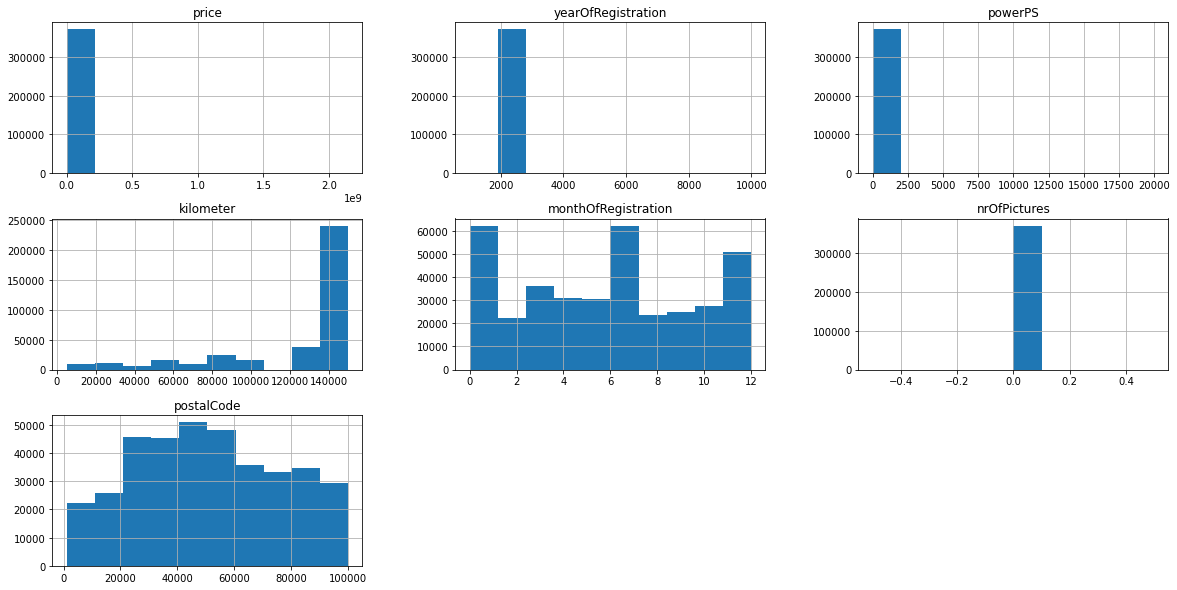

In [210]:
data.hist(bins=10, figsize=figsize)

In [70]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data[["vehicleType"]])

In [71]:
data_cat_encoded[:10]

array([[nan],
       [ 3.],
       [ 7.],
       [ 4.],
       [ 4.],
       [ 6.],
       [ 2.],
       [ 6.],
       [ 1.],
       [ 4.]])

In [72]:
ordinal_encoder.categories_

[array(['andere', 'bus', 'cabrio', 'coupe', 'kleinwagen', 'kombi',
        'limousine', 'suv', nan], dtype=object)]

In [74]:
data["vehicleTypeENCODE"].value_counts()

6.0    95894
4.0    80023
5.0    67564
1.0    30201
2.0    22898
3.0    19015
7.0    14707
0.0     3357
Name: vehicleTypeENCODE, dtype: int64

<AxesSubplot:>

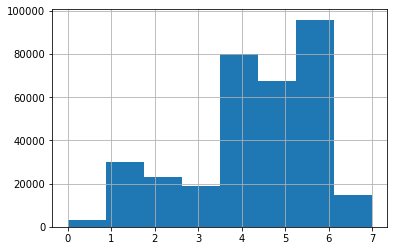

In [75]:
data["vehicleTypeENCODE"].hist(bins=8)

In [76]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.drop(
    ['dateCrawled', 'seller', 'offerType', 'dateCreated', 'postalCode', 'lastSeen', 'name', 'model', 'nrOfPictures'],
    axis = 1,
    inplace=True
)
data.shape

(260952, 12)

In [77]:
data.head(10)

,vehicleTypeENCODE,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,4.0,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,4.0,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
5,6.0,650,test,limousine,1995,manuell,102,150000,10,benzin,bmw,ja
6,2.0,2200,test,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
7,6.0,0,test,limousine,1980,manuell,50,40000,7,benzin,volkswagen,nein
10,6.0,2000,control,limousine,2004,manuell,105,150000,12,benzin,mazda,nein
11,5.0,2799,control,kombi,2005,manuell,140,150000,12,diesel,volkswagen,ja
14,7.0,17999,control,suv,2011,manuell,190,70000,3,diesel,nissan,nein
17,4.0,1750,control,kleinwagen,2004,automatik,75,150000,2,benzin,renault,nein
18,1.0,7550,test,bus,2007,manuell,136,150000,6,diesel,ford,nein


In [83]:
data["fuelType"].value_counts()

benzin     169239
diesel      86973
lpg          3937
cng           460
hybrid        213
andere         73
elektro        57
Name: fuelType, dtype: int64

In [78]:
numerical_columns = [i for i in data.columns if data[i].dtype.name != 'object']
print("Numerical: " + str(numerical_columns))

Numerical: ['vehicleTypeENCODE', 'price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


In [93]:
data_cat = data[["abtest", "gearbox", "fuelType", "brand", "notRepairedDamage"]]

In [95]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<260952x52 sparse matrix of type '<class 'numpy.float64'>'
	with 1304760 stored elements in Compressed Sparse Row format>

In [99]:
data_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [80]:
corr_matrix = data.corr()

In [81]:
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
yearOfRegistration     0.010434
powerPS                0.008640
monthOfRegistration    0.004747
vehicleTypeENCODE     -0.000016
kilometer             -0.013932
Name: price, dtype: float64

In [111]:
data.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [112]:
data["notRepairedDamage"].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64